# Import Library

In [20]:
#Import library
import pandas as pd
import joblib
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Data Prepocessing

In [ ]:
# Load Data
url = "https://raw.githubusercontent.com/RyanRizaldy/StuntTrack/main/capstoneProject/ML/dataset/data_balita_balanced.csv"
dataset= pd.read_csv(url)
dataset

In [ ]:
# Separate features (X) and target (y)
X = dataset[['Umur', 'Jenis_Kelamin', 'Tinggi_Badan']]
y = dataset['Status_Gizi']

In [ ]:
# Feature Scaling using Min-Max Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Saving the Scaler Object
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Splitting the Dataset into Training, Validation, and Testing Sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Modeling

In [ ]:
# Model Architecture
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),  
    Dense(16, activation='relu'),                                  
    Dense(4, activation='softmax')                                 
])

/Users/ventura/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Set Up Callbacks

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.3686 - loss: 1.2985 - val_accuracy: 0.6417 - val_loss: 0.8459
Epoch 2/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6912 - loss: 0.7690 - val_accuracy: 0.7447 - val_loss: 0.6660
Epoch 3/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.7780 - loss: 0.6103 - val_accuracy: 0.8455 - val_loss: 0.5089
Epoch 4/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8617 - loss: 0.4602 - val_accuracy: 0.8836 - val_loss: 0.4052
Epoch 5/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8914 - loss: 0.3725 - val_accuracy: 0.8903 - val_loss: 0.3471
Epoch 6/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.9042 - loss: 0.3247 - val_accuracy: 0.8903 - val_loss: 0.3196
Epoch 7/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9108 - loss: 0.2932 - val_accuracy: 0.9051 - val_loss: 0.2838
Epoch 8/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.9160 - loss: 0

# Model Summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214 (4.75 KB)

 Trainable params: 404 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 810 (3.17 KB)

# Evaluate the Model

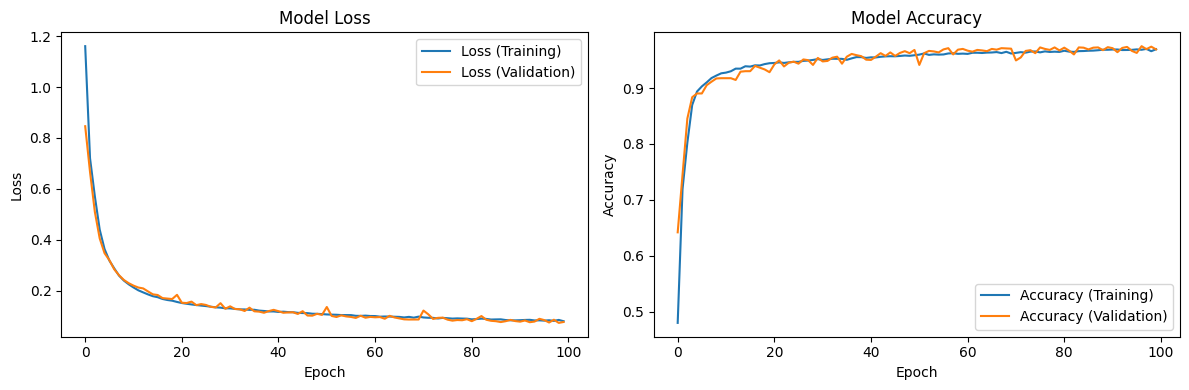

In [ ]:
# Visualizing Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualizing Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.9771 - loss: 0.0696
Test loss: 0.06831950694322586
Test accuracy: 0.9771607518196106


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
(2233,)
(2233,)


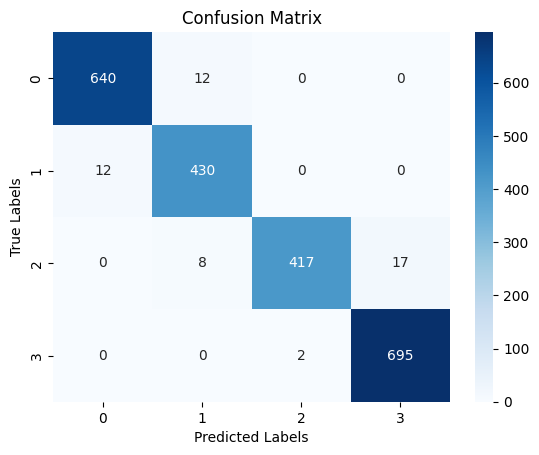

In [ ]:
# Model prediction from the previous model
y_pred = model.predict(X_test)
# If the model is for multi-class classification
y_pred_binary = y_pred.argmax(axis=1)  # Get the class with the highest probability

# Check the shape of the data
print(y_pred_binary.shape)  # Should be (n_samples,)
print(y_test.shape)         # Should be (n_samples,)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average="macro")
recall = recall_score(y_test, y_pred_binary, average="macro")
f1 = f1_score(y_test, y_pred_binary, average="macro")

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the metrics report
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

Precision: 0.977125243348994
Recall: 0.9737538110814026
F1 Score: 0.9752192566485515
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       652
           1       0.96      0.97      0.96       442
           2       1.00      0.94      0.97       442
           3       0.98      1.00      0.99       697

    accuracy                           0.98      2233
   macro avg       0.98      0.97      0.98      2233
weighted avg       0.98      0.98      0.98      2233



# Save the Model

In [ ]:
model.save('mlp_model.h5')

# Test the model

In [ ]:
# Load the saved scaler
scaler = joblib.load('scaler.pkl')

# Load the trained model
from tensorflow.keras.models import load_model
trained_model = load_model('mlp_model.h5')

In [ ]:
new_data = pd.DataFrame({
    'Umur': [50],  
    'Jenis_Kelamin': [1],
    'Tinggi_Badan': [20]  
})

new_data_scaled = scaler.transform(new_data)

predictions = trained_model.predict(new_data_scaled)

predicted_class = predictions.argmax(axis=1)[0]

classes = ['severely stunted', 'stunted', 'normal', 'tinggi']
print(f"Predicted class: {classes[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted class: severely stunted
